In [1]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.manifold import MDS, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import joblib, random
from matplotlib import offsetbox

In [2]:
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', '$', '#']

In [3]:
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Loading Training Data
X_train = np.load('Data/data_train.npy').T
t_train = np.load('Data/labels_train.npy')

print(X_train.shape, t_train.shape)

(6720, 90000) (6720,)


In [4]:
from PIL import Image
import cv2

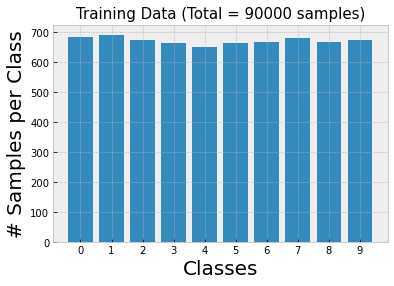

In [5]:
# Counting number samples per class
vals, counts = np.unique(t_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(10),range(10))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(X_train.shape[1])+' samples)',size=15);

In [6]:
#Resizing the image since kernel was dying.

NEW_SIZE = (50,50)
INTERPOLATION = cv2.INTER_CUBIC
data = []

for i in range(6720):
    img = X_train[i,:].reshape(300,300)
    img = cv2.resize(img, NEW_SIZE[::-1], interpolation=INTERPOLATION)
    data.append(img.flatten())

X_train_resized = np.array(data)
X_train_resized.shape

(6720, 2500)

### Project Solution

#### Estimator 1: Logistic Regression

In [7]:
lr = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('RFE',RFE(estimator = lr, step = 500)),
                      ('LR', lr)])
# Creating Validation sets
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Grid Search
# Cvals=np.arange(0.01,1,0.01) #L-1 penalty in Logistic Regression
n_features=[1000,1500] # number of features to keep

# Parameter Grid Search
param_grid = {'RFE__n_features_to_select': n_features}
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring='accuracy')

# Train the model
grid_search.fit(X_train_resized, t_train)

# # Apply the best hyperpameter values
print(grid_search.best_params_)
pipe.set_params(**grid_search.best_params_)

# # Train the final model with these hyperparameter values
pipe.fit(X_train_resized,t_train)
y_train=pipe.predict(X_train_resized)
print('\nTraining Set Performance for Logistic Regression Classifier')
print('Accuracy Score:', accuracy_score(t_train, y_train))
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train))
print('\nPerformance Report: ')
print(classification_report(t_train,y_train))

joblib.dump(pipe, 'Models/LR_RFE1.pkl')

{'RFE__n_features_to_select': 1000}


Training Set Performance for Logistic Regression Classifier
Accuracy Score: 61.011904761904766 %
Confusion Matrix:
[[424  27  48  41  24  20  26  39  15  21]
 [ 24 400  40  25  15  32  29  70  29  26]
 [ 22  30 465  28  32  18  21  19  11  27]
 [ 60  22  36 400  21  19  29  28  20  30]
 [ 14  29  70  28 364  40  22  32  25  27]
 [ 25  30  33  33  33 382  38  34  36  19]
 [ 30  24  29  24  25  24 420  17  53  23]
 [ 34  49  47  21  26  13  18 436  18  20]
 [ 27  34  21  24  14  39  47  28 395  39]
 [ 22  27  23  25  27  30  29  35  42 414]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62       685
         1.0       0.60      0.58      0.59       690
         2.0       0.57      0.69      0.63       673
         3.0       0.62      0.60      0.61       665
         4.0       0.63      0.56      0.59       651
         5.0       0.62      0.58      0.60       663
         6.0    

In [35]:
lr = LogisticRegression(solver='liblinear', multi_class='auto')

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('RFE',RFE(estimator = lr, step = 500))])
# Creating Validation sets
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Grid Search
# Cvals=np.arange(0.01,1,0.01) #L-1 penalty in Logistic Regression
n_features=[600,700] # number of features to keep

# Parameter Grid Search
param_grid = {'RFE__n_features_to_select': n_features}
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring='accuracy')

# Train the model
grid_search.fit(X_train_resized, t_train)

# # Apply the best hyperpameter values
print(grid_search.best_params_)
pipe.set_params(**grid_search.best_params_)

# # Train the final model with these hyperparameter values
pipe.fit(X_train_resized,t_train)
y_train=pipe.predict(X_train_resized)
print('\nTraining Set Performance for Logistic Regression Classifier')
print('Accuracy Score:', accuracy_score(t_train, y_train))
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train))
print('\nPerformance Report: ')
print(classification_report(t_train,y_train))

joblib.dump(pipe, 'Models/LR_RFE1.pkl')

{'RFE__n_features_to_select': 700}

Training Set Performance for Logistic Regression Classifier
Accuracy Score: 0.5985119047619047
Confusion Matrix:
[[403  28  47  43  36  16  33  47  15  17]
 [ 34 390  45  22  20  31  34  59  33  22]
 [ 18  33 475  25  33  13  24  17  13  22]
 [ 54  27  31 393  19  25  32  31  20  33]
 [ 15  37  78  28 346  32  26  37  25  27]
 [ 20  31  32  34  32 387  34  27  49  17]
 [ 31  21  31  24  16  25 400  22  66  33]
 [ 35  43  49  19  24  19  18 428  21  26]
 [ 18  31  24  23  18  52  46  34 393  29]
 [ 24  27  29  27  21  26  32  40  41 407]]

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.62      0.59      0.60       685
         1.0       0.58      0.57      0.57       690
         2.0       0.56      0.71      0.63       673
         3.0       0.62      0.59      0.60       665
         4.0       0.61      0.53      0.57       651
         5.0       0.62      0.58      0.60       663
         6.0       

['Models/LR_RFE1.pkl']

#### Estimator 2: Random Forest

In [7]:
rf = RandomForestClassifier(n_estimators = 50, max_depth = 3)

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('RFE',RFE(estimator = rf, n_features_to_select = 1000))])
# Creating Validation sets
cv = StratifiedKFold(n_splits=5, shuffle=True)

# n_features=[1000] # number of features to keep

# Parameter Grid Search
# param_grid = {'RFE__n_features_to_select': n_features,
#              'Random_For__n_estimators': [100],
#             'Random_For__max_depth': [2]
#              }
# grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring='accuracy')

# Train the model
# grid_search.fit(X_train_resized, t_train)
pipe.fit(X_train_resized, t_train)

# # Apply the best hyperpameter values
# print(grid_search.best_params_)
# pipe.set_params(**grid_search.best_params_)

# Train the final model with these hyperparameter values
# pipe.fit(X_train_resized,t_train)
y_train_rf=pipe.predict(X_train_resized)
print('\n\nTraining Set Performance for Random Forest Classifier')
print('Accuracy Score:', accuracy_score(t_train, y_train_rf))

print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train_rf))
print('Performance Report: ')
print(classification_report(t_train,y_train_rf))
print('\n\n')

joblib.dump(pipe, 'Models/Random_Forest_RFE1.pkl')



Training Set Performance for Random Forest Classifier
Accuracy Score: 1.0
Confusion Matrix:
[[685   0   0   0   0   0   0   0   0   0]
 [  0 690   0   0   0   0   0   0   0   0]
 [  0   0 673   0   0   0   0   0   0   0]
 [  0   0   0 665   0   0   0   0   0   0]
 [  0   0   0   0 651   0   0   0   0   0]
 [  0   0   0   0   0 663   0   0   0   0]
 [  0   0   0   0   0   0 669   0   0   0]
 [  0   0   0   0   0   0   0 682   0   0]
 [  0   0   0   0   0   0   0   0 668   0]
 [  0   0   0   0   0   0   0   0   0 674]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       685
         1.0       1.00      1.00      1.00       690
         2.0       1.00      1.00      1.00       673
         3.0       1.00      1.00      1.00       665
         4.0       1.00      1.00      1.00       651
         5.0       1.00      1.00      1.00       663
         6.0       1.00      1.00      1.00       669
         7.0       1.

['Models/Random_Forest_RFE1.pkl']

In [19]:
pipe = joblib.load('Models/Random_Forest_RFE1.pkl')

#Following pixels were selected
np.where(pipe.named_steps['RFE'].support_== True)[0]

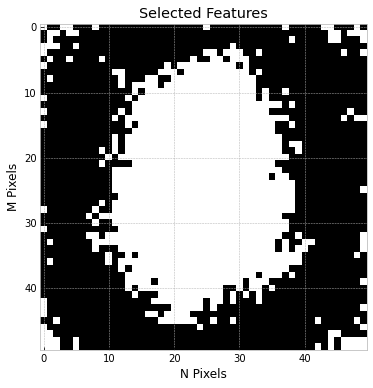

In [53]:
#Plot of selected pixels
plt.figure(figsize=(10, 6))
plt.title(f"Selected Features")
plt.imshow(pipe.named_steps['RFE'].support_.reshape(50,50), cmap='gray')
plt.xlabel("N Pixels")
plt.ylabel("M Pixels")
plt.show()

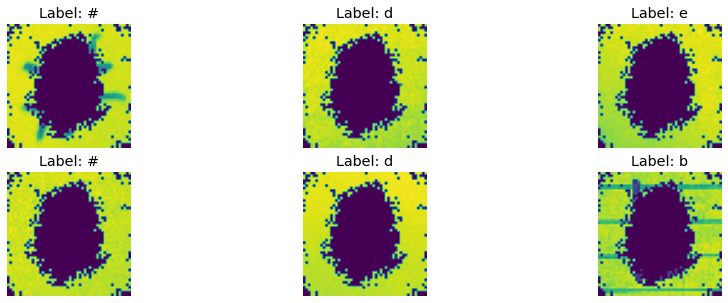

In [73]:
# Displaying mask examples from training set
fig = plt.figure(figsize=(15,5))
X_train_mask = X_train_resized
for i in range(6):
    fig.add_subplot(2,3,i+1)
    num_im = random.randint(0, 6720)
    mask = np.where(pipe.named_steps['RFE'].support_ == 0, X_train_mask[num_im], 0)
    plt.imshow(mask.reshape(50,50))
    plt.axis('off')
    plt.title(f"Label: {class_names[int(t_train[num_im])]}");
    

#### 2. Principal Component Analysis

Text(0.5, 0, 'Principal components')

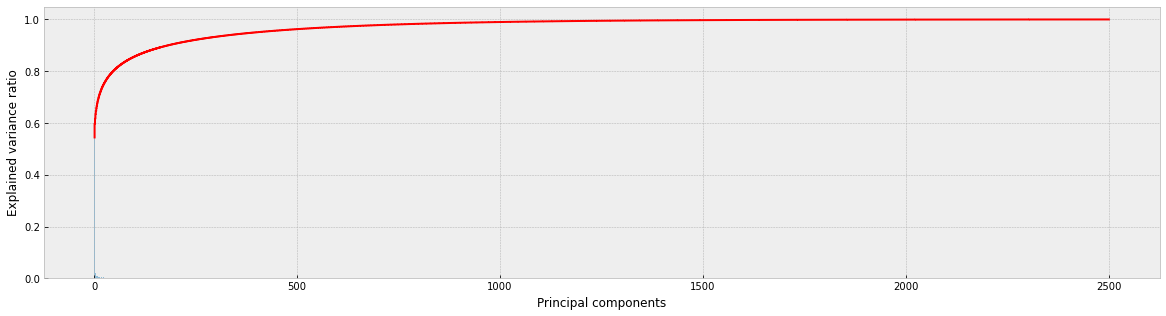

In [51]:

pipe = Pipeline([('mixmax', MinMaxScaler()),
           ('pca',PCA())])

pipe.fit(X_train_resized)

variance_ratio = pipe.named_steps['pca'].explained_variance_ratio_

cumulative_variance_ratio = np.cumsum(variance_ratio)

plt.figure(figsize=(20,5))
plt.step(range(1,2501),cumulative_variance_ratio,c='r')
plt.bar(range(1,2501),variance_ratio, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')



In [31]:
# A = pipe.named_steps['pca'].components_[:182]

np.where(cumulative_variance_ratio >=0.9)[0][0]

182

In [32]:
pipe.named_steps['pca'].components_

array([[-1.90309277e-02, -1.91422112e-02, -1.94262531e-02, ...,
        -2.16543685e-02, -2.11928025e-02, -2.09317017e-02],
       [-1.68069975e-02, -1.63535750e-02, -1.60390628e-02, ...,
        -2.41394974e-02, -2.36709081e-02, -2.31665969e-02],
       [-3.18281580e-02, -3.15941100e-02, -3.11099902e-02, ...,
        -5.91480505e-03, -6.32462965e-03, -6.74655004e-03],
       ...,
       [-3.35989151e-02,  3.38045017e-02,  3.84399611e-02, ...,
        -1.47148576e-02,  2.81596679e-02, -2.45394369e-02],
       [ 5.96386936e-03,  1.15246399e-02,  5.15875126e-03, ...,
         2.09217403e-02,  8.07471553e-03, -1.95319838e-02],
       [-8.76327890e-03,  2.68130505e-03, -1.29099927e-02, ...,
         4.64509109e-02,  8.86826779e-05, -3.11850227e-02]])

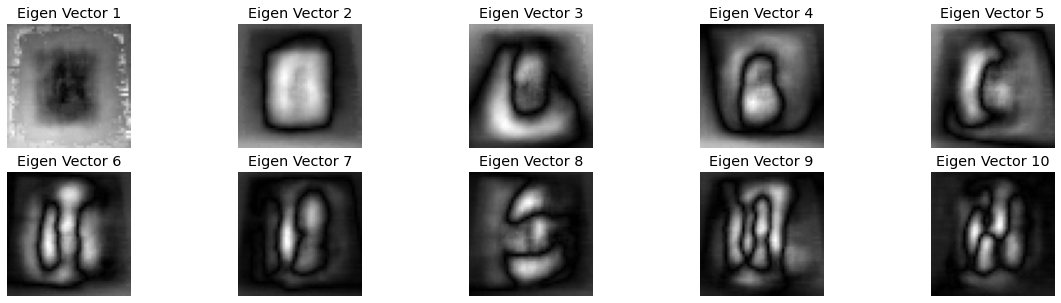

In [65]:
#Visualization of Eigen vectors
grid_loc = 1
plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(2,5,grid_loc)
    plt.imshow(abs(pipe.named_steps['pca'].components_[i,:].reshape(50,50)),cmap='gray')
    plt.title(f"Eigen Vector {grid_loc}")
    plt.axis('off')
    grid_loc+=1

['Models/PCA2.pkl']

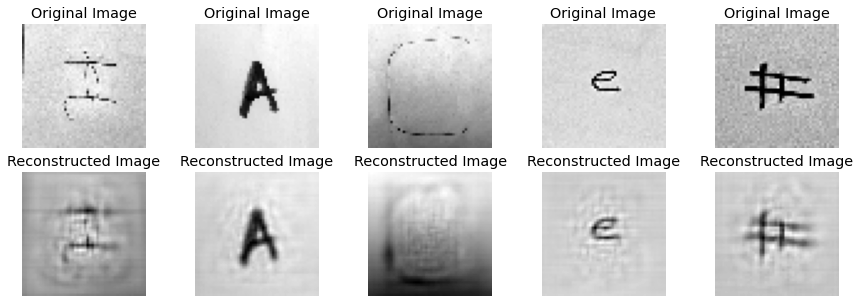

In [34]:
#Reconstruction from Eigen Vectors
N_eigenvectors = 182 # 90 percent variance

pipe = Pipeline([('scaler', MinMaxScaler()),
                   ('pca', PCA(n_components=N_eigenvectors))])
# pipe.fit(X_train_resized)
ypca = pipe.fit_transform(X_train_resized)
X_reconst = pipe.inverse_transform(ypca)

#Increase N for more images
N = 5

fig = plt.figure(figsize=(15,5))
idx = np.random.choice(range(X_reconst.shape[0]),replace=False,size=N)
j=1
for i in range(N):
    fig.add_subplot(2,N,j)
    plt.imshow(X_train_resized[idx[i],:].reshape(50,50), cmap='gray')
    plt.axis('off')
    plt.title('Original Image');

    fig.add_subplot(2,N,j+N)
    plt.imshow(X_reconst[idx[i],:].reshape(50,50), cmap='gray')
    plt.axis('off')
    plt.title('Reconstructed Image');
    j+=1
    
joblib.dump(pipe, 'Models/PCA2.pkl')

In [35]:
from sklearn.linear_model import LogisticRegression

pipe1 = Pipeline([('scaler1', MinMaxScaler()),
                   ('pca1', PCA(n_components=182)),   #90% explained variance corresponds to 182 PCs
                 ('LR1',LogisticRegression(max_iter = 800))])

pipe2 = Pipeline([('scaler2', MinMaxScaler()),
                 ('LR2',LogisticRegression(max_iter = 800))])

In [36]:
# Training with PCA
pipe1.fit(X_train_resized,t_train)
y_train1 = pipe1.predict(X_train_resized)

joblib.dump(pipe1, 'Models/LR_PCA2.pkl')

['Models/LR_PCA2.pkl']

In [37]:
# Training without PCA
pipe2.fit(X_train_resized,t_train)
y_train2 = pipe2.predict(X_train_resized)

joblib.dump(pipe2, 'Models/LR_NOPCA2.pkl')

/apps/python/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['Models/LR_NOPCA2.pkl']

In [38]:
# Training Performance of both the models

print('Training Set Performance for model with PCA')
print('Accuracy Score:', accuracy_score(t_train, y_train1))
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train1))
print('\nPerformance Report: ')
print(classification_report(t_train,y_train1))
print('\n\n')


Training Set Performance for model with PCA
Accuracy Score: 0.4928571428571429
Confusion Matrix:
[[338  29  48  49  43  20  47  62  19  30]
 [ 38 323  71  30  17  23  31  89  38  30]
 [ 22  37 439  30  48  18  25  32   8  14]
 [ 68  30  49 323  24  27  45  40  20  39]
 [ 18  33 113  45 291  39  36  20  26  30]
 [ 22  29  47  35  50 304  59  39  54  24]
 [ 29  27  38  40  30  39 335  31  69  31]
 [ 48  70  55  27  32  13  25 361  20  31]
 [ 30  49  26  38  18  70  71  44 279  43]
 [ 33  25  42  36  44  40  36  45  54 319]]

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.52      0.49      0.51       685
         1.0       0.50      0.47      0.48       690
         2.0       0.47      0.65      0.55       673
         3.0       0.49      0.49      0.49       665
         4.0       0.49      0.45      0.47       651
         5.0       0.51      0.46      0.48       663
         6.0       0.47      0.50      0.49       669
         7.0     

In [39]:
print('\n\n Training Set Performance for model without PCA')
print('Accuracy Score:', accuracy_score(t_train, y_train2))
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train2))
print('\nPerformance Report: ')
print(classification_report(t_train,y_train2))
print('\n\n')




 Training Set Performance for model without PCA
Accuracy Score: 0.7532738095238095
Confusion Matrix:
[[526  16  25  22  19  11  22  27   6  11]
 [  9 505  30  12  12  19  21  46  18  18]
 [ 14  19 543  16  20   8  19  14   7  13]
 [ 40  14  22 488  13  15  19  18  14  22]
 [ 16  16  38  17 469  18  22  20  16  19]
 [ 21  16  30  16  20 481  26  22  19  12]
 [ 19  11  14  10   9  23 533  10  28  12]
 [ 24  34  28  20  16   9  17 512   9  13]
 [ 16  14  18  23  14  25  30  24 486  18]
 [ 14  13   6  12  17  24  16  25  28 519]]

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       685
         1.0       0.77      0.73      0.75       690
         2.0       0.72      0.81      0.76       673
         3.0       0.77      0.73      0.75       665
         4.0       0.77      0.72      0.74       651
         5.0       0.76      0.73      0.74       663
         6.0       0.74      0.80      0.76       669
         7.

#### 3. Fisher's LDA and t-SNE


/scratch/local/15693744/ipykernel_4102909/2594853714.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


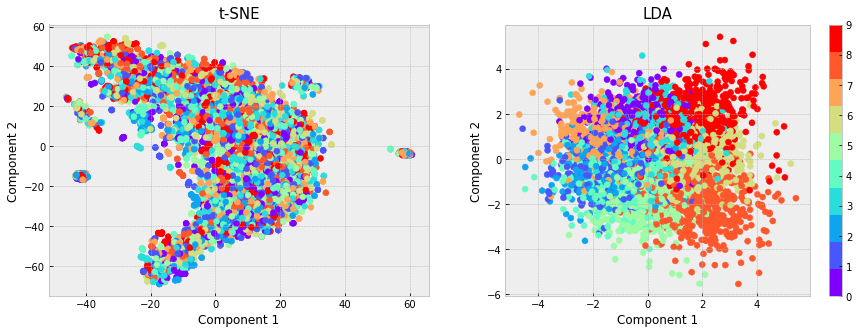

In [52]:
#Fisher's LDA
lda = LDA(n_components=2)
lda.fit(X_train_resized, t_train)
y_train_lda = lda.transform(X_train_resized)

#t-SNE
tSNE = TSNE(n_components=2,learning_rate='auto', init='random')

y_train_sne = tSNE.fit_transform(X_train_resized)

#Visualize the dataset, be sure to color-code each point to its corresponding target label.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.title('t-SNE', fontsize=15)
plt.scatter(y_train_sne[:,0], y_train_sne[:,1], c=t_train, cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.subplot(1,2,2); plt.title('LDA', fontsize=15)
plt.scatter(y_train_lda[:,0], y_train_lda[:,1], c=t_train, cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar();

In [53]:
#Grid Search to find number of features? 
cv = StratifiedKFold(n_splits=5, shuffle=True)
#Fisher's LDA

# lda_num_feat = LDA()

pipe_LDA = Pipeline([('scaler', MinMaxScaler()),
                    ('LDA', LDA()),
                    ('LR', LogisticRegression())])

param_grid = {'LDA__n_components': [2,4,6,8]}

grid_search_lda = GridSearchCV(pipe_LDA, param_grid=param_grid, cv=cv, scoring='accuracy')

# Train the model
grid_search_lda.fit(X_train_resized, t_train)

# # Apply the best hyperpameter values
print("Best number of features for Fisher's LDA:", grid_search_lda.best_params_)
pipe_LDA.set_params(**grid_search_lda.best_params_)

Best number of features for Fisher's LDA: {'LDA__n_components': 8}


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('LDA', LinearDiscriminantAnalysis(n_components=8)),
                ('LR', LogisticRegression())])

In [54]:
lda_num_feat = LDA(n_components = 8)
y_train_lda = lda_num_feat.fit_transform(X_train_resized, t_train)

joblib.dump(lda_num_feat, 'Models/LR_LDA3.pkl')

['Models/LR_LDA3.pkl']

In [55]:
# Define a function to perform dimensionality reduction with varying n_components and evaluate accuracy to compute best n_components
def find_n_components_tsne(n_components_list, X_train, t_train):
    best_accuracy = 0
    accuracy = 0
    results = []
    for n_components in n_components_list:
        tsne = TSNE(n_components = n_components, learning_rate='auto', init='random' )
        X_train_reduced = tsne.fit_transform(X_train)

        # Train a classifier (Random Forest in this case)
        clf = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')
        clf.fit(X_train_reduced, t_train)

        # Make predictions on the test set
        y_pred = clf.predict(X_train_reduced)

        # Calculate accuracy and store the result
        accuracy = accuracy_score(t_train, y_pred)
        if best_accuracy < accuracy:
            best_accuracy = accuracy
            best_component = n_components
       
    results.append(best_component)
    return results

In [56]:
#tsne ----------- NOT SURE-----------------------
# param_grid = {'tSNE__n_components': [2,4,6,8]}

# tsne = TSNE(learning_rate='auto', init='random')

# pipe_sne = Pipeline([('scaler', MinMaxScaler()),
#                     ('LR', LogisticRegression())])

# grid_search_sne = GridSearchCV(pipe_sne, param_grid=param_grid, cv=cv, scoring='accuracy')

# # Train the model
# grid_search_sne.fit(X_train_resized, t_train)

# # # Apply the best hyperpameter values
# print("Best number of features for t-SNE:",grid_search_sne.best_params_)
# pipe_sne.set_params(**grid_search_sne.best_params_)



n_components_list = [1,2,3]
results = find_n_components_tsne(n_components_list, X_train_resized, t_train)

print("Number of Components:", results[0])

tsne = TSNE(n_components = results[0], learning_rate='auto', init='random')

joblib.dump(tsne, 'Models/LR_tSNE3.pkl')

Number of Components: 3


['Models/LR_tSNE3.pkl']

/scratch/local/15693744/ipykernel_4102909/1468947823.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))
/scratch/local/15693744/ipykernel_4102909/1468947823.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))
/scratch/local/15693744/ipykernel_4102909/1468947823.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))


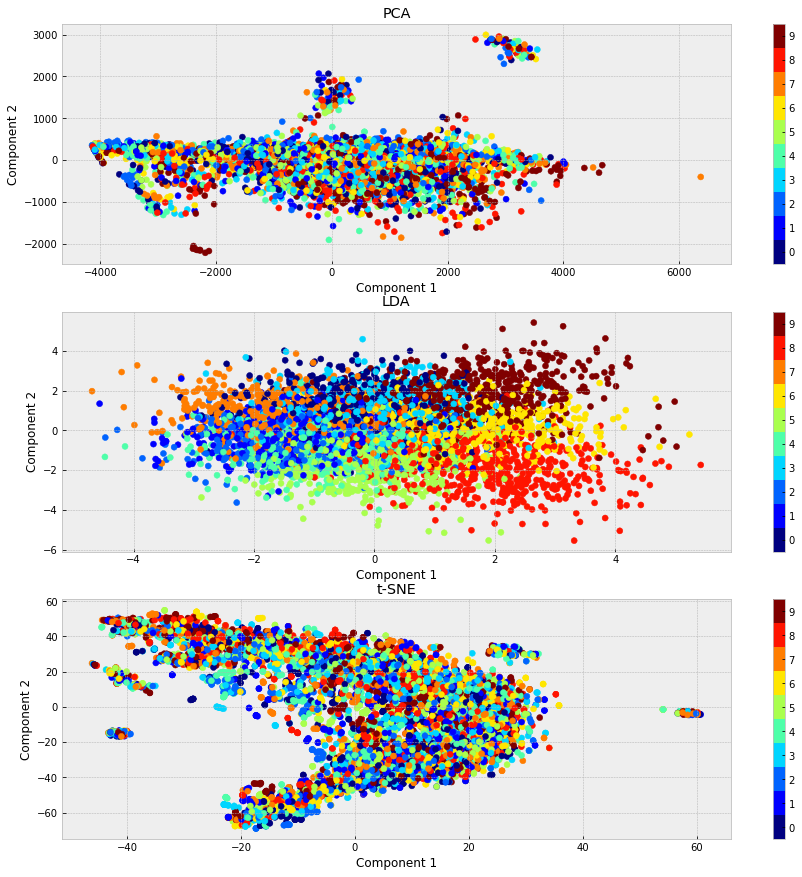

In [59]:
#Visualization and comparison with PCA

pca = PCA(n_components=2)
y_train_pca = pca.fit_transform(X_train_resized)

#PCA plot
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.scatter(y_train_pca[:, 0], y_train_pca[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.clim(-0.5, 9.5); plt.title('PCA')

#FLDA plot
plt.subplot(3,1,2)
plt.scatter(y_train_lda[:, 0], y_train_lda[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.clim(-0.5, 9.5); plt.title('LDA')

#tSNE
plt.subplot(3,1,3)
plt.scatter(y_train_sne[:, 0], y_train_sne[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.clim(-0.5, 9.5); plt.title('t-SNE');

#### 4. Manifold Learning Algorithms

In [10]:
#MDS
mds = MDS(n_components=300, dissimilarity='euclidean')


pipe = Pipeline([('scaler', MinMaxScaler()),
                      ('LR', LogisticRegression(solver='liblinear', multi_class='auto'))])

X_train_mds = mds.fit_transform(X_train_resized)
pipe.fit(X_train_mds,t_train)
y_train_mds = pipe.predict(X_train_mds)


joblib.dump(mds, 'Models/MDS4.pkl')
joblib.dump(pipe, 'Models/MDSclf.pkl')

['Models/MDSclf.pkl']

In [11]:
iso = Isomap(n_components=182, n_neighbors = 10)

X_train_iso = iso.fit_transform(X_train_resized)
pipe.fit(X_train_iso,t_train)
y_train_iso = pipe.predict(X_train_iso)

joblib.dump(iso, 'Models/Isomap4.pkl')
joblib.dump(pipe, 'Models/isoclf.pkl')

/apps/python/3.10/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


['Models/isoclf.pkl']

In [12]:
#LLE

lle = LLE(n_components=182, n_neighbors=10)

X_train_lle = lle.fit_transform(X_train_resized)
pipe.fit(X_train_lle,t_train)
y_train_lle = pipe.predict(X_train_lle)

joblib.dump(lle, 'Models/LLE4.pkl')
joblib.dump(pipe, 'Models/lleclf.pkl')

['Models/lleclf.pkl']

In [10]:
#Algorithm to select
#Classification report

print('\n\n Training Set Performance for MDS')
print('Accuracy Score:', accuracy_score(t_train, y_train_mds))
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train_mds))
print('\nPerformance Report: ')
print(classification_report(t_train,y_train_mds))
print('\n\n')


print('\n\n Training Set Performance for LLE')
print('Accuracy Score:', accuracy_score(t_train, y_train_lle))
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train_lle))
print('\nPerformance Report: ')
print(classification_report(t_train,y_train_lle))
print('\n\n')


print('\n\n Training Set Performance for ISOMAP')
print('Accuracy Score:', accuracy_score(t_train, y_train_iso))
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train_iso))
print('\nPerformance Report: ')
print(classification_report(t_train,y_train_iso))
print('\n\n')




 Training Set Performance for MDS
Accuracy Score: 0.26264880952380953
Confusion Matrix:
[[160  62  71  57  38  55  73  54  42  73]
 [ 60 158  91  49  43  47  52  75  71  44]
 [ 58  54 260  40  52  47  45  60  20  37]
 [ 55  44  86 133  35  35  85  53  73  66]
 [ 54  68  91  55 140  44  53  50  34  62]
 [ 41  53  73  34  46 155  55  70  89  47]
 [ 71  42  67  66  40  51 161  36  82  53]
 [ 53  82  92  42  40  44  51 161  57  60]
 [ 43  41  49  41  29  48  52  49 246  70]
 [ 62  51  62  44  35  46  49  45  89 191]]

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.24      0.23      0.24       685
         1.0       0.24      0.23      0.23       690
         2.0       0.28      0.39      0.32       673
         3.0       0.24      0.20      0.22       665
         4.0       0.28      0.22      0.24       651
         5.0       0.27      0.23      0.25       663
         6.0       0.24      0.24      0.24       669
         7.0       0.25 

In [28]:
#Training for 2D visualizations

#MDS
mds = MDS(n_components=2, dissimilarity='euclidean')
X_train_mds = mds.fit_transform(X_train_resized)
# joblib.dump(mds, 'Models/MDS4.pkl')

#Isomap
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train_resized)
# joblib.dump(iso, 'Models/Isomap4.pkl')

#LLE
lle = LLE(n_components=2, n_neighbors=10)
X_train_lle = lle.fit_transform(X_train_resized)
# joblib.dump(lle, 'Models/LLE4.pkl')

/apps/python/3.10/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


/scratch/local/15693744/ipykernel_4102909/3281107350.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))
/scratch/local/15693744/ipykernel_4102909/3281107350.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))
/scratch/local/15693744/ipykernel_4102909/3281107350.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))


Text(0.5, 1.0, 'ISOMAP')

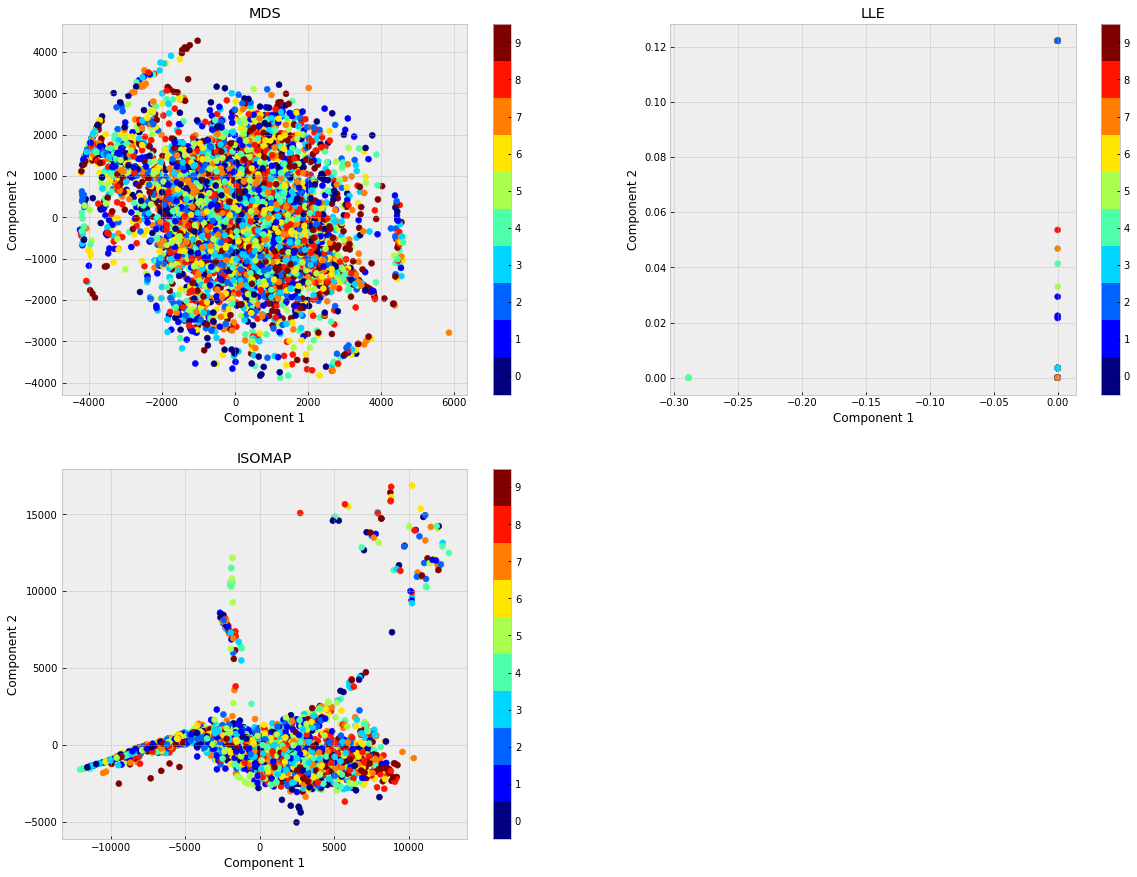

In [60]:
#Visualization of the three Algorithms

plt.figure(figsize=(20,15))

#MDS
plt.subplot(2,2,1)
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.clim(-0.5, 9.5); plt.title('MDS')

#LLE
plt.subplot(2,2,2)
plt.scatter(X_train_lle[:, 0], X_train_lle[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.clim(-0.5, 9.5); plt.title('LLE')

#Isomap
plt.subplot(2,2,3)
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.clim(-0.5, 9.5); plt.title('ISOMAP')



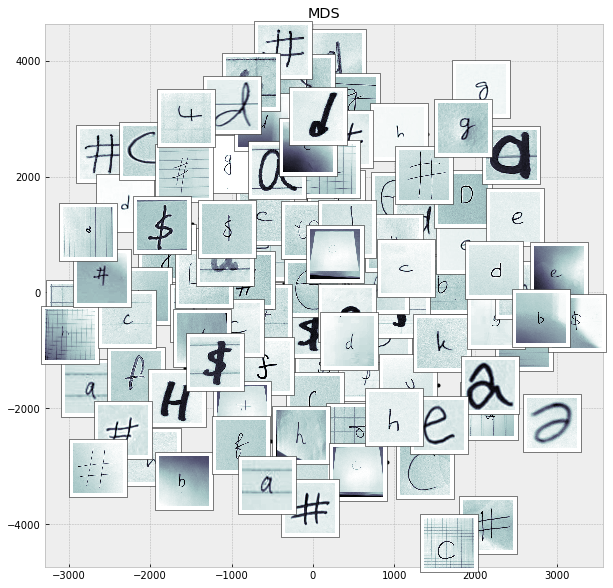

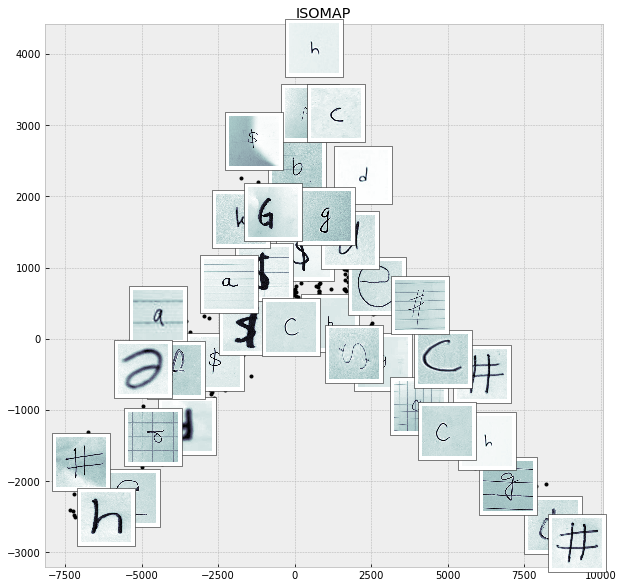

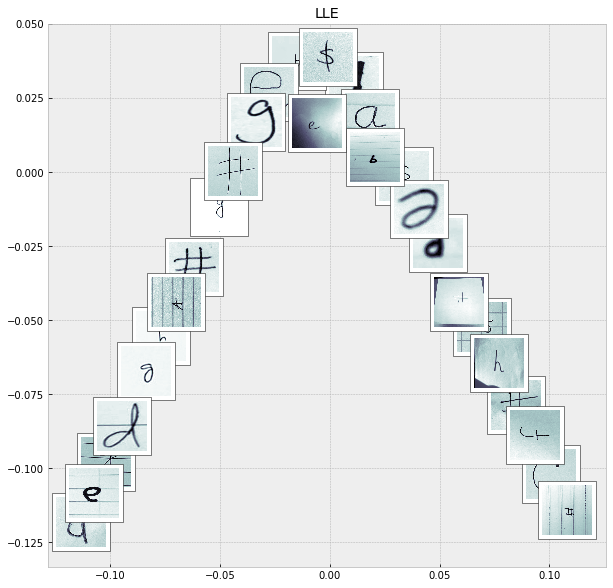

In [29]:
#Visualizing data to see what the algorithms are considering important in the first 2 eigen vectors.

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)
            
            
data = X_train_resized[::15]

fig, ax = plt.subplots(figsize=(10, 10))
# mds = MDS(n_components=2)
plot_components(data, mds, images=X_train_resized.reshape((-1, 50, 50)),
                ax=ax, thumb_frac=0.05, cmap='bone')
plt.title('MDS')

# ISOMAP
fig, ax = plt.subplots(figsize=(10, 10))
# isomap = Isomap(n_components=2)
plot_components(data, iso, images=X_train_resized.reshape((-1, 50, 50)),
                ax=ax, thumb_frac=0.05, cmap='bone')
plt.title('ISOMAP')

# LLE
fig, ax = plt.subplots(figsize=(10, 10))
# lle = LLE(n_components=2)
plot_components(data, lle, images=X_train_resized.reshape((-1, 50, 50)),
                ax=ax, thumb_frac=0.05, cmap='bone')
plt.title('LLE');